<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.496632,73.610141,28.261646,-0.089278,179.279142,179.313195,-0.034053
1,0.0,1.0,81.483887,58.747774,58.421880,0.024525,208.678067,208.634373,0.043694
2,0.0,2.0,61.902207,35.121183,41.762415,-0.093079,148.692726,148.757999,-0.065273
3,0.0,3.0,64.620418,99.660235,70.253440,-0.068235,244.465858,244.520628,-0.054769
4,0.0,4.0,54.519854,67.782378,24.734134,-0.070876,156.965489,156.981345,-0.015855
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.333993,23.959161,24.000855,0.132965,155.426974,155.306608,0.120366
29996,999.0,26.0,84.007041,75.638834,50.184506,0.053224,219.883605,219.817131,0.066475
29997,999.0,27.0,85.799815,28.100518,27.064536,-0.014929,150.949940,150.971641,-0.021701
29998,999.0,28.0,48.133899,35.564140,65.964910,-0.063540,159.599409,159.646313,-0.046904


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.496632  73.610141  28.261646  ...  179.279142  179.313195 -0.034053
      1.0    81.483887  58.747774  58.421880  ...  208.678067  208.634373  0.043694
      2.0    61.902207  35.121183  41.762415  ...  148.692726  148.757999 -0.065273
      3.0    64.620418  99.660235  70.253440  ...  244.465858  244.520628 -0.054769
      4.0    54.519854  67.782378  24.734134  ...  156.965489  156.981345 -0.015855
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   97.333993  23.959161  24.000855  ...  155.426974  155.306608  0.120366
      26.0   84.007041  75.638834  50.184506  ...  219.883605  219.817131  0.066475
      27.0   85.799815  28.100518  27.064536  ...  150.949940  150.971641 -0.021701
      28.0   48.133899  35.564140  65.964910  ...  159.599409  159.646313 -0.046904
      29.0   97.620185  42.244534  23.090473  ...  172.875329  172.962530 -0.087201

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.496632  73.610141  28.261646  ...  179.279142  179.313195 -0.034053
      1.0    81.483887  58.747774  58.421880  ...  208.678067  208.634373  0.043694
      2.0    61.902207  35.121183  41.762415  ...  148.692726  148.757999 -0.065273
      3.0    64.620418  99.660235  70.253440  ...  244.465858  244.520628 -0.054769
      4.0    54.519854  67.782378  24.734134  ...  156.965489  156.981345 -0.015855
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   97.333993  23.959161  24.000855  ...  155.426974  155.306608  0.120366
      26.0   84.007041  75.638834  50.184506  ...  219.883605  219.817131  0.066475
      27.0   85.799815  28.100518  27.064536  ...  150.949940  150.971641 -0.021701
      28.0   48.133899  35.564140  65.964910  ...  159.599409  159.646313 -0.046904
      29.0   97.620185  42.244534  23.090473  ...  172.875329  172.962530 -0.087201

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.496632,73.610141,28.261646,-0.089278,179.279142,179.313195,-0.034053
1,0.0,1.0,81.483887,58.747774,58.421880,0.024525,208.678067,208.634373,0.043694
2,0.0,2.0,61.902207,35.121183,41.762415,-0.093079,148.692726,148.757999,-0.065273
3,0.0,3.0,64.620418,99.660235,70.253440,-0.068235,244.465858,244.520628,-0.054769
4,0.0,4.0,54.519854,67.782378,24.734134,-0.070876,156.965489,156.981345,-0.015855
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.333993,23.959161,24.000855,0.132965,155.426974,155.306608,0.120366
29996,999.0,26.0,84.007041,75.638834,50.184506,0.053224,219.883605,219.817131,0.066475
29997,999.0,27.0,85.799815,28.100518,27.064536,-0.014929,150.949940,150.971641,-0.021701
29998,999.0,28.0,48.133899,35.564140,65.964910,-0.063540,159.599409,159.646313,-0.046904


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.496632  73.610141  28.261646  ...  179.279142  179.313195 -0.034053
      1.0    81.483887  58.747774  58.421880  ...  208.678067  208.634373  0.043694
      2.0    61.902207  35.121183  41.762415  ...  148.692726  148.757999 -0.065273
      3.0    64.620418  99.660235  70.253440  ...  244.465858  244.520628 -0.054769
      4.0    54.519854  67.782378  24.734134  ...  156.965489  156.981345 -0.015855
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   97.333993  23.959161  24.000855  ...  155.426974  155.306608  0.120366
      26.0   84.007041  75.638834  50.184506  ...  219.883605  219.817131  0.066475
      27.0   85.799815  28.100518  27.064536  ...  150.949940  150.971641 -0.021701
      28.0   48.133899  35.564140  65.964910  ...  159.599409  159.646313 -0.046904
      29.0   97.620185  42.244534  23.090473  ...  172.875329  172.962530 -0.087201

[30000 rows x 7 columns]

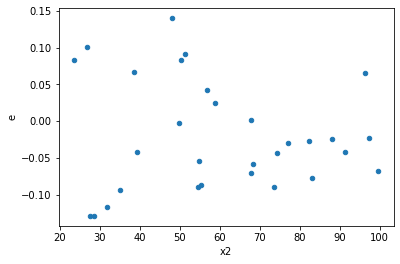

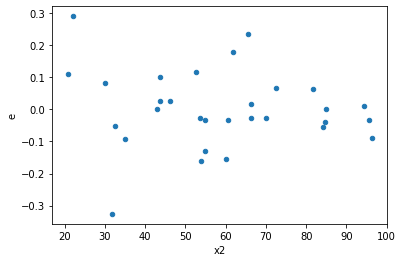

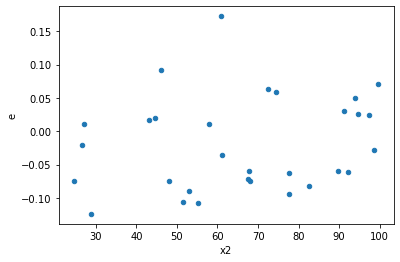

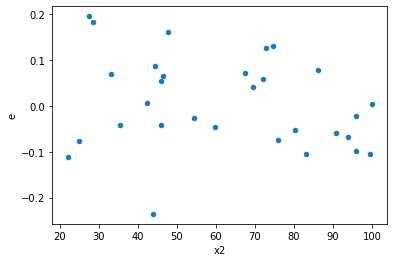

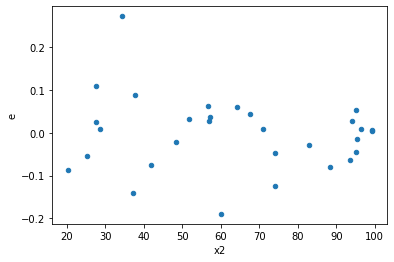

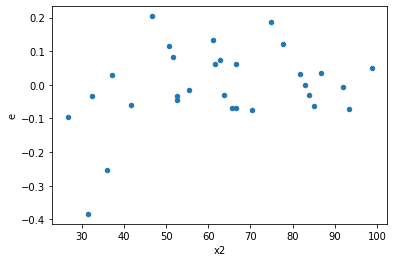

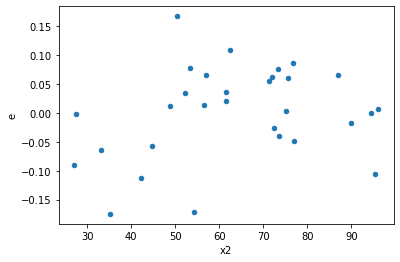

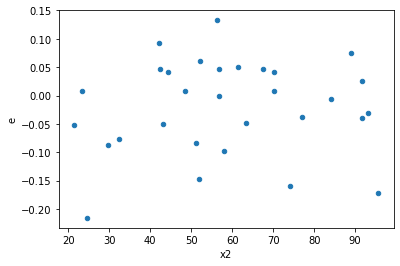

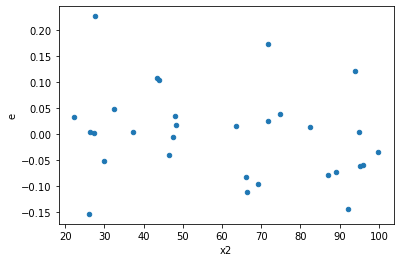

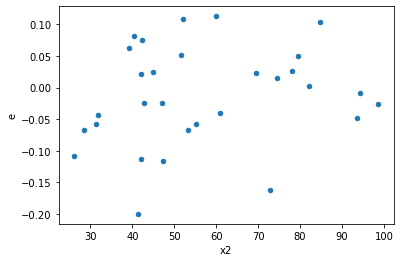

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,14.0,0.015854141012796245,0.11273540738056814,0.0015854141012796245,0.00805252909861201,5.07913301144012,0.006310479173735839,0.9968447604131321,0.0031552395868679195,Reject001=0 : Heteroscedasticity
2.0,12.0,12.0,0.04611445671502713,0.07913580653569853,0.0038428713929189277,0.006594650544641544,1.716073703843742,0.3624255071567779,0.818787246421611,0.18121275357838895,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,0.09086367120955705,0.13845791712277622,0.006490262229254075,0.013845791712277622,2.1333177648615465,0.2319518099665383,0.8840240950167308,0.11597590498326915,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,0.040254647990383675,0.10652547590874296,0.003659513453671243,0.008194267377595613,2.2391685346518075,0.16878041340758587,0.9156097932962071,0.08439020670379294,Reject001=1 : Homoscedasticity
6.0,10.0,14.0,0.06019015756194738,0.08944370801530195,0.006019015756194738,0.006388836286807282,1.0614420273334435,0.8943772370401555,0.5528113814799223,0.44718861852007774,Reject001=1 : Homoscedasticity
10.0,12.0,12.0,0.10456850125366207,0.1442822465375728,0.008714041771138506,0.012023520544797732,1.3797868842699885,0.585776112130354,0.707111943934823,0.292888056065177,Reject001=1 : Homoscedasticity
11.0,12.0,12.0,0.03078429224587914,0.17526276907385768,0.002565357687156595,0.014605230756154807,5.693253158916421,0.00520333543188789,0.997398332284056,0.002601667715943945,Reject001=0 : Heteroscedasticity
15.0,11.0,13.0,0.048577274342223614,0.1201560287877288,0.004416115849293056,0.009242771445209907,2.0929639893141654,0.20635099617869646,0.8968245019106518,0.10317549808934823,Reject001=1 : Homoscedasticity
17.0,13.0,11.0,0.0664497520776845,0.22235267615220977,0.005111519390591115,0.020213879650200887,3.9545736024026468,0.028569442796697153,0.9857152786016514,0.014284721398348577,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,14.0,0.015854141012796245,0.11273540738056814,0.0015854141012796245,0.00805252909861201,5.07913301144012,0.006310479173735839,Reject001=0 : Heteroscedasticity
1.0,15.0,9.0,0.2098595404632245,0.08531276909682743,0.013990636030881633,0.00947919656631416,0.6775386440895653,0.48531098894218,Reject001=1 : Homoscedasticity
2.0,12.0,12.0,0.04611445671502713,0.07913580653569853,0.0038428713929189277,0.006594650544641544,1.716073703843742,0.3624255071567779,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,0.09086367120955705,0.13845791712277622,0.006490262229254075,0.013845791712277622,2.1333177648615465,0.2319518099665383,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,0.040254647990383675,0.10652547590874296,0.003659513453671243,0.008194267377595613,2.2391685346518075,0.16878041340758587,Reject001=1 : Homoscedasticity
5.0,14.0,10.0,0.19001360731911238,0.06434541911560643,0.01357240052279374,0.006434541911560643,0.47409018771250927,0.19611597426594277,Reject001=1 : Homoscedasticity
6.0,10.0,14.0,0.06019015756194738,0.08944370801530195,0.006019015756194738,0.006388836286807282,1.0614420273334435,0.8943772370401555,Reject001=1 : Homoscedasticity
7.0,19.0,5.0,0.15310619080422,0.005359605859973164,0.008058220568643158,0.0010719211719946327,0.13302206893737617,0.0009680677611616752,Reject001=0 : Heteroscedasticity
8.0,11.0,13.0,0.09242094115051422,0.09744180639897704,0.008401903740955839,0.00749552356915208,0.892122047603863,0.8600316978507104,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      916
Reject001=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64